In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Intro - 2 Ways

(For detailed explanations of these two interfaces, the reader may refer to
- https://matplotlib.org/tutorials/introductory/lifecycle.html
or
- https://pbpython.com/effective-matplotlib.html )
- DataCamp cheatsheet https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf
- Customising https://matplotlib.org/users/customizing.html

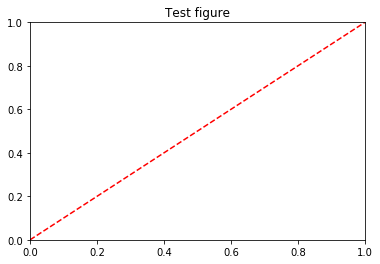

In [4]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Test figure')        
plt.show();

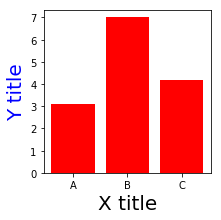

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(3,3))
ax.bar(x=['A','B','C'], height=[3.1,7,4.2], color='r')
ax.set_xlabel(xlabel='X title', size=20)
ax.set_ylabel(ylabel='Y title' , color='b', size=20)
plt.show();

# The Grid

![Image](https://pbpython.com/images/matplotlib-anatomy.png)

![Image](https://pbpython.com/images/matplotlib-pbpython-example-header.png)

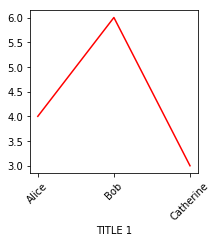

In [7]:
# Simple OO-Plot
fig, ax = plt.subplots(figsize=(3,3))
ax.plot(['Alice','Bob','Catherine'], [4,6,3], color='r')
ax.set_xlabel('TITLE 1')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show();

> https://matplotlib.org/api/axes_api.html

# Common Plots via Seaborn

**sns.barplot / sns.distplot / sns.lineplot / sns.kdeplot / sns.violinplot 
sns.scatterplot / sns.boxplot / sns.heatmap**

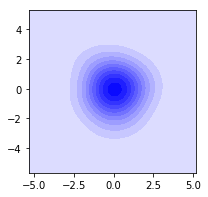

In [9]:
# E.g. 2D kde plots
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(1)
numerical_1 = np.random.randn(100)
np.random.seed(2)
numerical_2 = np.random.randn(100)
fig, ax = plt.subplots(figsize=(3,3))
sns.kdeplot(data=numerical_1,
            data2= numerical_2,
            ax=ax,
            shade=True, 
            color="blue",  
            bw=1)
plt.show();

> The key is the argument `ax=ax`. When running .kdeplot() method, seaborn would apply the changes to ax, an ‘axes’ object.

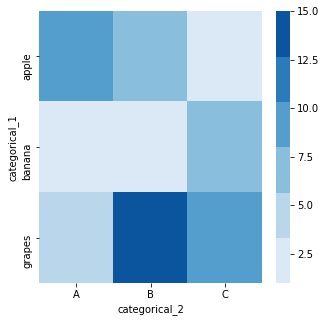

In [10]:
# heat map
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(dict(categorical_1=['apple', 'banana', 'grapes',
                                      'apple', 'banana', 'grapes',
                                      'apple', 'banana', 'grapes'], 
                  categorical_2=['A','A','A','B','B','B','C','C','C'], 
                  value=[10,2,5,7,3,15,1,6,8]))
pivot_table = df.pivot("categorical_1", "categorical_2", "value")
# try printing out pivot_table to see what it looks like!
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(data=pivot_table, 
            cmap=sns.color_palette("Blues"),
            ax=ax)

plt.show();

# High Dimension

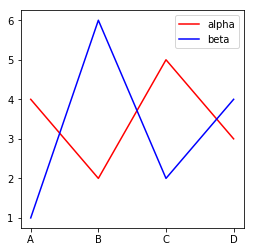

In [11]:
# Overlay
fig, ax = plt.subplots(figsize=(4,4))
sns.lineplot(x=['A','B','C','D'], 
             y=[4,2,5,3],
             color='r',
             ax=ax)
sns.lineplot(x=['A','B','C','D'], 
             y=[1,6,2,4], 
             color='b',
             ax=ax)    
ax.legend(['alpha', 'beta'], facecolor='w')
plt.show();

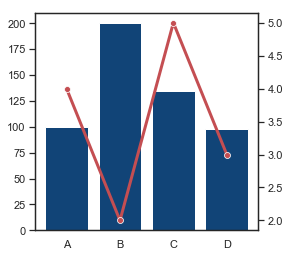

In [12]:
# combine charts with same-x but not different-y
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax1 = plt.subplots(figsize=(4,4))
ax2 = ax1.twinx()
sns.barplot(x=['A','B','C','D'],
            y=[100,200,135,98], 
            color='#004488',
            ax=ax1)
sns.lineplot(x=['A','B','C','D'], 
             y=[4,2,5,3],
             color='r',
             marker="o",
             ax=ax2)
plt.show()
sns.set();

> Because the two plots have different y-axis, we need to create another ‘axes’ object with the same x-axis (using .twinx()) and then plot on different ‘axes’. sns.set(…) is to set specific aesthetics for the current plot, and we run sns.set() in the end to set everything back to default settings.

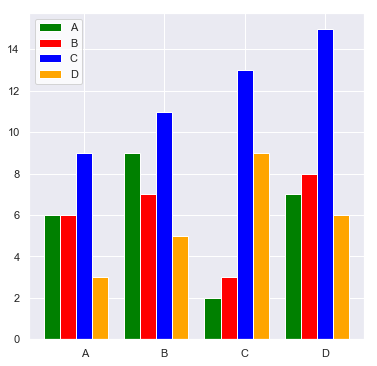

In [13]:
import matplotlib.pyplot as plt
categorical_1 = ['A', 'B', 'C', 'D']
colors        = ['green', 'red', 'blue', 'orange']
numerical = [[6, 9, 2, 7],
             [6, 7, 3, 8],
             [9, 11, 13, 15],
             [3, 5, 9, 6]]
number_groups = len(categorical_1) 
bin_width = 1.0/(number_groups+1)
fig, ax = plt.subplots(figsize=(6,6))
for i in range(number_groups):
    ax.bar(x=np.arange(len(categorical_1)) + i*bin_width, 
           height=numerical[i],
           width=bin_width,
           color=colors[i],
           align='center')
ax.set_xticks(np.arange(len(categorical_1)) + number_groups/(2*(number_groups+1)))
# number_groups/(2*(number_groups+1)): offset of xticklabel
ax.set_xticklabels(categorical_1)
ax.legend(categorical_1, facecolor='w')
plt.show();

**FacetGrid**
https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

**Scatter**
https://seaborn.pydata.org/generated/seaborn.scatterplot.html

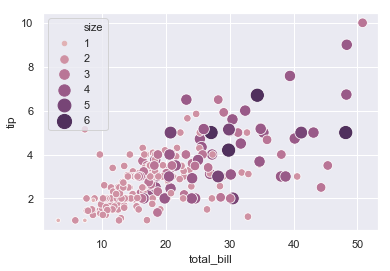

In [14]:
import seaborn as sns
tips = sns.load_dataset("tips")
ax = sns.scatterplot(x="total_bill", y="tip",                      
                     hue="size", size="size",
                     sizes=(20, 200), hue_norm=(0, 7),
                     legend="full", data=tips)
plt.show();

# Figure Wrangling

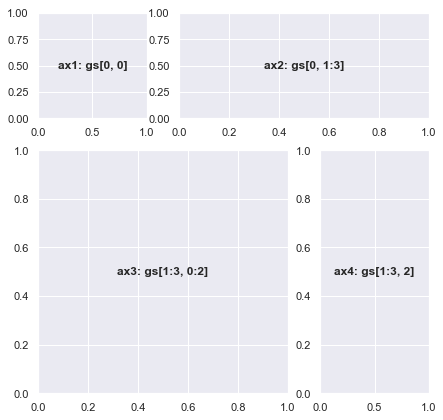

In [16]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(7,7))
gs = gridspec.GridSpec(nrows=3, 
                       ncols=3, 
                       figure=fig, 
                       width_ratios= [1, 1, 1],
                       height_ratios=[1, 1, 1],
                       wspace=0.3,
                       hspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax1.text(0.5, 0.5, 'ax1: gs[0, 0]', fontsize=12, fontweight="bold", va="center", ha="center")  # adding text to ax1
ax2 = fig.add_subplot(gs[0, 1:3])
ax2.text(0.5, 0.5, 'ax2: gs[0, 1:3]', fontsize=12, fontweight="bold", va="center", ha="center")
ax3 = fig.add_subplot(gs[1:3, 0:2])
ax3.text(0.5, 0.5, 'ax3: gs[1:3, 0:2]', fontsize=12, fontweight="bold", va="center", ha="center")
ax4 = fig.add_subplot(gs[1:3, 2])
ax4.text(0.5, 0.5, 'ax4: gs[1:3, 2]', fontsize=12, fontweight="bold", va="center", ha="center")
plt.show();

> In the example, we first partition the figure into 3*3 = 9 small boxes with gridspec.GridSpec(), and then define a few axes objects. Each axes object could contain one or more boxes. Say in the codes above, gs[0, 1:3] = gs[0, 1] + gs[0, 2] is assigned to axes object ax2. wspace and hspace are parameters controlling the space between plots.

# Advanced Visual

```python
freq = ((df_gp.Age.value_counts(normalize = True).reset_index().sort_values(by = 'index').Age)*100).tolist()
number_gp = 7

# freq = the percentage for each age group, and there’re 7 age groups.
def ax_settings(ax, var_name, x_min, x_max):
    ax.set_xlim(x_min,x_max)
    ax.set_yticks([])
    
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.spines['bottom'].set_edgecolor('#444444')
    ax.spines['bottom'].set_linewidth(2)
    
    ax.text(0.02, 0.05, var_name, fontsize=17, fontweight="bold", transform = ax.transAxes) 
    return None

# Manipulate each axes object in the left. Try to tune some parameters and you'll know how each command works.
fig = plt.figure(figsize=(12,7))
gs = gridspec.GridSpec(nrows=number_gp, 
                       ncols=2, 
                       figure=fig, 
                       width_ratios= [3, 1],
                       height_ratios= [1]*number_gp,
                       wspace=0.2, hspace=0.05
                      )
ax = [None]*(number_gp + 1)
features = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
# Create a figure, partition the figure into 7*2 boxes, set up an ax array to store axes objects, and create a list of age group names.  
for i in range(number_gp):
    ax[i] = fig.add_subplot(gs[i, 0])
    
    ax_settings(ax[i], 'Age: ' + str(features[i]), -1000, 20000)    
    
    sns.kdeplot(data=df_gp[(df_gp.Gender == 'M') & (df_gp.Age == features[i])].Purchase, 
            ax=ax[i], shade=True, color="blue",  bw=300, legend=False)
    sns.kdeplot(data=df_gp[(df_gp.Gender == 'F') & (df_gp.Age == features[i])].Purchase, 
            ax=ax[i], shade=True, color="red",  bw=300, legend=False)
    
    if i < (number_gp - 1): 
        ax[i].set_xticks([])
# this 'for loop' is to create a bunch of axes objects, and link them to GridSpec boxes. Then, we manipulate them with sns.kdeplot() and ax_settings() we just defined.
ax[0].legend(['Male', 'Female'], facecolor='w')
# adding legends on the top axes object     
ax[number_gp] = fig.add_subplot(gs[:, 1])
ax[number_gp].spines['right'].set_visible(False)
ax[number_gp].spines['top'].set_visible(False)
ax[number_gp].barh(features, freq, color='#004c99', height=0.4)
ax[number_gp].set_xlim(0,100)
ax[number_gp].invert_yaxis()
ax[number_gp].text(1.09, -0.04, '(%)', fontsize=10, transform = ax[number_gp].transAxes)   
ax[number_gp].tick_params(axis='y', labelsize = 14)
# manipulate the bar plot on the right. Try to comment out some of the commands to see what they actually do to the bar plot.

plt.show()
```

**HEAVY EDITING**

```python
plt.rcParams['figure.figsize'] = [15, 10]

fontdict={'fontsize': 18,
          'weight' : 'bold',
         'horizontalalignment': 'center'}

fontdictx={'fontsize': 18,
          'weight' : 'bold',
          'horizontalalignment': 'center'}

fontdicty={'fontsize': 16,
          'weight' : 'bold',
          'verticalalignment': 'baseline',
          'horizontalalignment': 'center'}

spring = plt.scatter('temp', 'cnt', data=day[day['season']==1], marker='o', color='green')
summer = plt.scatter('temp', 'cnt', data=day[day['season']==2], marker='o', color='orange')
autumn = plt.scatter('temp', 'cnt', data=day[day['season']==3], marker='o', color='brown')
winter = plt.scatter('temp', 'cnt', data=day[day['season']==4], marker='o', color='blue')
plt.legend(handles=(spring,summer,autumn,winter),
           labels=('Spring', 'Summer', 'Fall/Autumn', 'Winter'),
           title="Season", title_fontsize=16,
           scatterpoints=1,
           bbox_to_anchor=(1, 0.7), loc=2, borderaxespad=1.,
           ncol=1,
           fontsize=14)
plt.title('Bike Rentals at Different Temperatures\nBy Season', fontdict=fontdict, color="black")
plt.xlabel("Normalized temperature", fontdict=fontdictx)
plt.ylabel("Count of Total Rental Bikes", fontdict=fontdicty);
```

**Subplot**

```python
fig = plt.figure()

plt.rcParams['figure.figsize'] = [15,10]
plt.rcParams["font.weight"] = "bold"

fontdict={'fontsize': 25,
          'weight' : 'bold'}

fontdicty={'fontsize': 18,
          'weight' : 'bold',
          'verticalalignment': 'baseline',
          'horizontalalignment': 'center'}

fontdictx={'fontsize': 18,
          'weight' : 'bold',
          'horizontalalignment': 'center'}

plt.subplots_adjust(wspace=0.2, hspace=0.2)

fig.suptitle('Bike Rentals at Different Temperatures\nBy Season', fontsize=25,fontweight="bold", color="black", 
             position=(0.5,1.01))

ax1 = fig.add_subplot(221)
ax1.scatter('temp', 'cnt', data=day[day['season']==1], c="green")
ax1.set_title('Spring', fontdict=fontdict, color="green")
ax1.set_ylabel("Count of Total Rental Bikes", fontdict=fontdicty, position=(0,-0.1))


ax2 = fig.add_subplot(222)
ax2.scatter('temp', 'cnt', data=day[day['season']==2], c="orange")
ax2.set_title('Summer', fontdict=fontdict, color="orange")



ax3 = fig.add_subplot(223)
ax3.scatter('temp', 'cnt', data=day[day['season']==3], c="brown")
ax3.set_title('Fall or Autumn', fontdict=fontdict, color="brown")


ax4 = fig.add_subplot(224)
ax4.scatter('temp', 'cnt', data=day[day['season']==4], c="blue")
ax4.set_title("Winter", fontdict=fontdict, color="blue")
ax4.set_xlabel("Normalized temperature", fontdict=fontdictx, position=(-0.1,0));
```

**Example**

```python
sns.set(rc={'figure.figsize':(20,20)}) 
sns.set_context('talk', font_scale=2) 
sns.set_style('ticks')
g = sns.relplot(x='temp', y='cnt', hue='Season', data=day,palette=['green','orange','brown','blue'],
                col='Season', col_wrap=2, legend=False
                height=4, aspect=1.6, style='Season', sizes=(800,1000))

g.fig.suptitle('Bike Rentals at Different Temperatures\nBy Season' ,position=(0.5,1.05), fontweight='bold', size=18)
g.set_xlabels("Normalized Temperature",fontweight='bold', size=15)
g.set_ylabels("Count of\nTotal Bike Rentals",fontweight='bold', size=20);
```

# Visualising Graph-based Relationship 2D Manifold

In [17]:
import sys

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import pandas as pd

from sklearn import cluster, covariance, manifold

In [18]:
# #############################################################################
# Retrieve the data from Internet

# The data is from 2003 - 2008. This is reasonably calm: (not too long ago so
# that we get high-tech firms, and before the 2008 crash). This kind of
# historical data can be obtained for from APIs like the quandl.com and
# alphavantage.co ones.

symbol_dict = {
    'TOT': 'Total',
    'XOM': 'Exxon',
    'CVX': 'Chevron',
    'COP': 'ConocoPhillips',
    'VLO': 'Valero Energy',
    'MSFT': 'Microsoft',
    'IBM': 'IBM',
    'TWX': 'Time Warner',
    'CMCSA': 'Comcast',
    'CVC': 'Cablevision',
    'YHOO': 'Yahoo',
    'DELL': 'Dell',
    'HPQ': 'HP',
    'AMZN': 'Amazon',
    'TM': 'Toyota',
    'CAJ': 'Canon',
    'SNE': 'Sony',
    'F': 'Ford',
    'HMC': 'Honda',
    'NAV': 'Navistar',
    'NOC': 'Northrop Grumman',
    'BA': 'Boeing',
    'KO': 'Coca Cola',
    'MMM': '3M',
    'MCD': 'McDonald\'s',
    'PEP': 'Pepsi',
    'K': 'Kellogg',
    'UN': 'Unilever',
    'MAR': 'Marriott',
    'PG': 'Procter Gamble',
    'CL': 'Colgate-Palmolive',
    'GE': 'General Electrics',
    'WFC': 'Wells Fargo',
    'JPM': 'JPMorgan Chase',
    'AIG': 'AIG',
    'AXP': 'American express',
    'BAC': 'Bank of America',
    'GS': 'Goldman Sachs',
    'AAPL': 'Apple',
    'SAP': 'SAP',
    'CSCO': 'Cisco',
    'TXN': 'Texas Instruments',
    'XRX': 'Xerox',
    'WMT': 'Wal-Mart',
    'HD': 'Home Depot',
    'GSK': 'GlaxoSmithKline',
    'PFE': 'Pfizer',
    'SNY': 'Sanofi-Aventis',
    'NVS': 'Novartis',
    'KMB': 'Kimberly-Clark',
    'R': 'Ryder',
    'GD': 'General Dynamics',
    'RTN': 'Raytheon',
    'CVS': 'CVS',
    'CAT': 'Caterpillar',
    'DD': 'DuPont de Nemours'}


symbols, names = np.array(sorted(symbol_dict.items())).T

quotes = []

for symbol in symbols:
    print('Fetching quote history for %r' % symbol, file=sys.stderr)
    url = ('https://raw.githubusercontent.com/scikit-learn/examples-data/'
           'master/financial-data/{}.csv')
    quotes.append(pd.read_csv(url.format(symbol)))

close_prices = np.vstack([q['close'] for q in quotes])
open_prices = np.vstack([q['open'] for q in quotes])

# The daily variations of the quotes are what carry most information
variation = close_prices - open_prices

Fetching quote history for 'AAPL'
Fetching quote history for 'AIG'
Fetching quote history for 'AMZN'
Fetching quote history for 'AXP'
Fetching quote history for 'BA'
Fetching quote history for 'BAC'
Fetching quote history for 'CAJ'
Fetching quote history for 'CAT'
Fetching quote history for 'CL'
Fetching quote history for 'CMCSA'
Fetching quote history for 'COP'
Fetching quote history for 'CSCO'
Fetching quote history for 'CVC'
Fetching quote history for 'CVS'
Fetching quote history for 'CVX'
Fetching quote history for 'DD'
Fetching quote history for 'DELL'
Fetching quote history for 'F'
Fetching quote history for 'GD'
Fetching quote history for 'GE'
Fetching quote history for 'GS'
Fetching quote history for 'GSK'
Fetching quote history for 'HD'
Fetching quote history for 'HMC'
Fetching quote history for 'HPQ'
Fetching quote history for 'IBM'
Fetching quote history for 'JPM'
Fetching quote history for 'K'
Fetching quote history for 'KMB'
Fetching quote history for 'KO'
Fetching quote h

In [19]:
# #############################################################################

# Learn a graphical structure from the correlations
edge_model = covariance.GraphicalLassoCV(cv=5)

# standardize the time series: using correlations rather than covariance
# is more efficient for structure recovery
X = variation.copy().T
X /= X.std(axis=0)
edge_model.fit(X)

GraphicalLassoCV(alphas=4, assume_centered=False, cv=5, enet_tol=0.0001,
         max_iter=100, mode='cd', n_jobs=None, n_refinements=4, tol=0.0001,
         verbose=False)

In [20]:
# #############################################################################
# Cluster using affinity propagation

_, labels = cluster.affinity_propagation(edge_model.covariance_)
n_labels = labels.max()

for i in range(n_labels + 1):
    print('Cluster %i: %s' % ((i + 1), ', '.join(names[labels == i])))

Cluster 1: Apple, Amazon, Yahoo
Cluster 2: Comcast, Cablevision, Time Warner
Cluster 3: ConocoPhillips, Chevron, Total, Valero Energy, Exxon
Cluster 4: Cisco, Dell, HP, IBM, Microsoft, SAP, Texas Instruments
Cluster 5: Boeing, General Dynamics, Northrop Grumman, Raytheon
Cluster 6: AIG, American express, Bank of America, Caterpillar, CVS, DuPont de Nemours, Ford, General Electrics, Goldman Sachs, Home Depot, JPMorgan Chase, Marriott, 3M, Ryder, Wells Fargo, Wal-Mart
Cluster 7: McDonald's
Cluster 8: GlaxoSmithKline, Novartis, Pfizer, Sanofi-Aventis, Unilever
Cluster 9: Kellogg, Coca Cola, Pepsi
Cluster 10: Colgate-Palmolive, Kimberly-Clark, Procter Gamble
Cluster 11: Canon, Honda, Navistar, Sony, Toyota, Xerox


In [21]:
# #############################################################################
# Find a low-dimension embedding for visualization: find the best position of
# the nodes (the stocks) on a 2D plane

# We use a dense eigen_solver to achieve reproducibility (arpack is
# initiated with random vectors that we don't control). In addition, we
# use a large number of neighbors to capture the large-scale structure.

node_position_model = manifold.LocallyLinearEmbedding(
    n_components=2, eigen_solver='dense', n_neighbors=6)

embedding = node_position_model.fit_transform(X.T).T

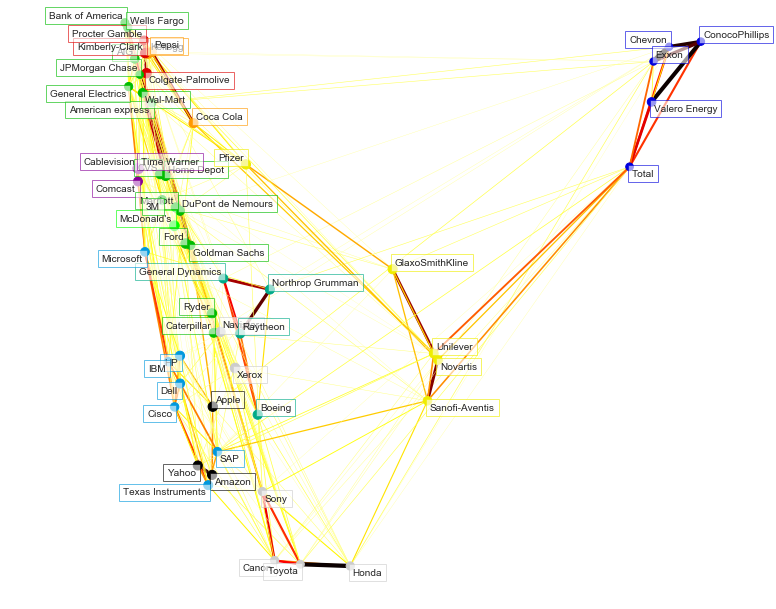

In [22]:
# #############################################################################
# Visualization
plt.figure(1, facecolor='w', figsize=(10, 8))
plt.clf()
ax = plt.axes([0., 0., 1., 1.])
plt.axis('off')

# Display a graph of the partial correlations
partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]
non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)

# Plot the nodes using the coordinates of our embedding
plt.scatter(embedding[0], embedding[1], s=100 * d ** 2, c=labels,
            cmap=plt.cm.nipy_spectral)

# Plot the edges
start_idx, end_idx = np.where(non_zero)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[embedding[:, start], embedding[:, stop]]
            for start, stop in zip(start_idx, end_idx)]
values = np.abs(partial_correlations[non_zero])
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.hot_r,
                    norm=plt.Normalize(0, .7 * values.max()))
lc.set_array(values)
lc.set_linewidths(15 * values)
ax.add_collection(lc)

# Add a label to each node. The challenge here is that we want to
# position the labels to avoid overlap with other labels
for index, (name, label, (x, y)) in enumerate(
        zip(names, labels, embedding.T)):

    dx = x - embedding[0]
    dx[index] = 1
    dy = y - embedding[1]
    dy[index] = 1
    this_dx = dx[np.argmin(np.abs(dy))]
    this_dy = dy[np.argmin(np.abs(dx))]
    if this_dx > 0:
        horizontalalignment = 'left'
        x = x + .002
    else:
        horizontalalignment = 'right'
        x = x - .002
    if this_dy > 0:
        verticalalignment = 'bottom'
        y = y + .002
    else:
        verticalalignment = 'top'
        y = y - .002
    plt.text(x, y, name, size=10,
             horizontalalignment=horizontalalignment,
             verticalalignment=verticalalignment,
             bbox=dict(facecolor='w',
                       edgecolor=plt.cm.nipy_spectral(label / float(n_labels)),
                       alpha=.6))

plt.xlim(embedding[0].min() - .15 * embedding[0].ptp(),
         embedding[0].max() + .10 * embedding[0].ptp(),)
plt.ylim(embedding[1].min() - .03 * embedding[1].ptp(),
         embedding[1].max() + .03 * embedding[1].ptp())

plt.show();

/Users/Ocean/.virtualenvs/general/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/Ocean/.virtualenvs/general/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/Ocean/.virtualenvs/general/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


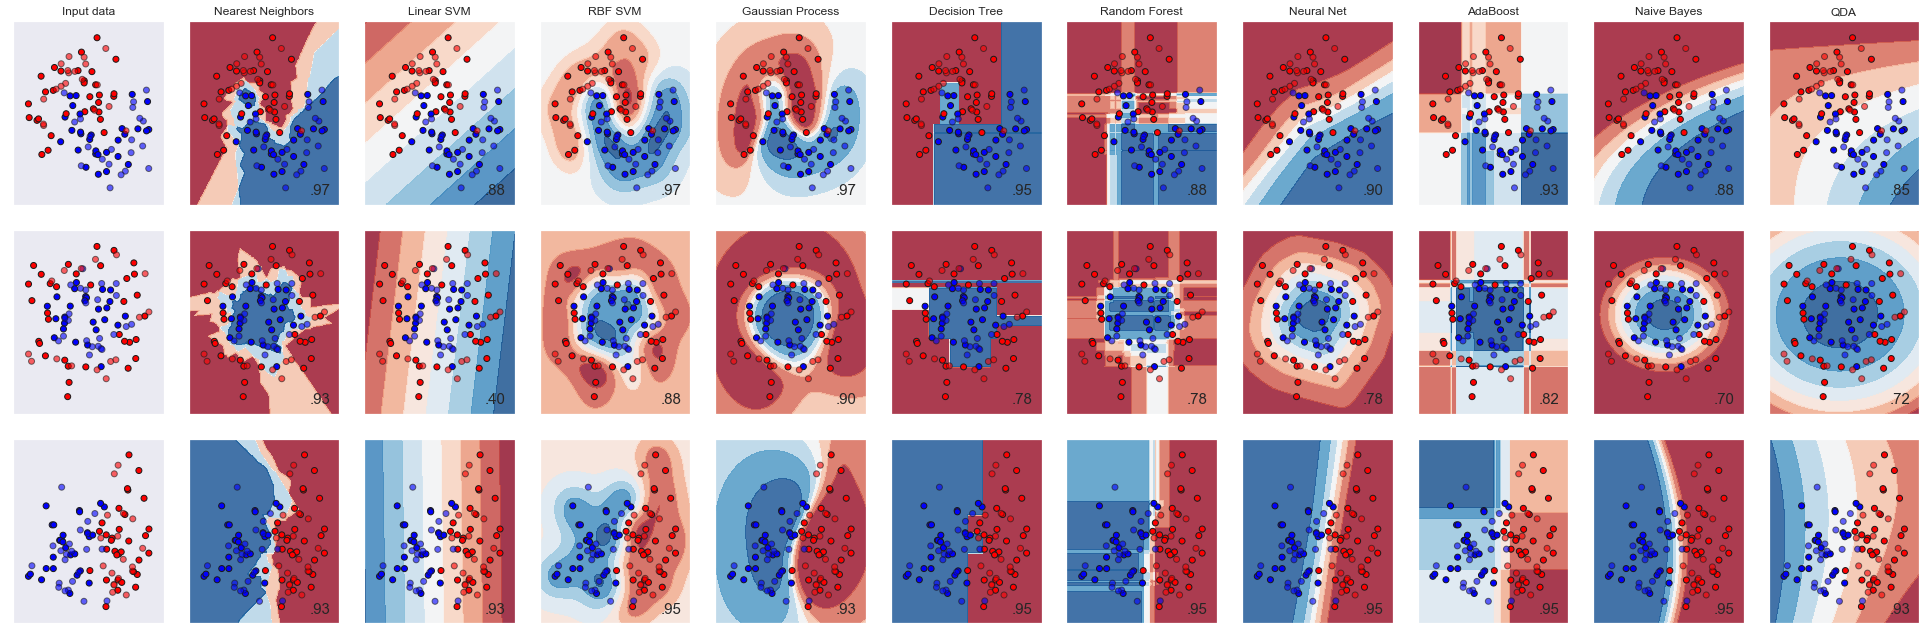

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show();

# Animation

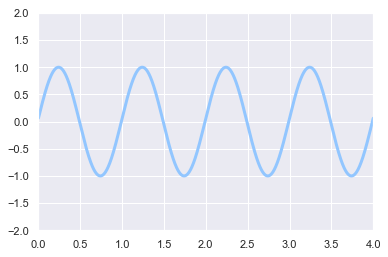

In [24]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


anim.save('sine_wave.gif', writer='imagemagick')

In [26]:
from IPython.display import IFrame
IFrame('sine_wave.gif', width=800, height=400)

Text(0.5, 1.0, 'Creating a growing coil with matplotlib!')

(-50.0, 50.0, -50.0, 50.0)

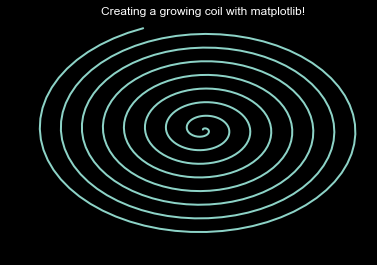

In [27]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
plt.style.use('dark_background')

fig = plt.figure() 
ax = plt.axes(xlim=(-50, 50), ylim=(-50, 50)) 
line, = ax.plot([], [], lw=2) 

# initialization function 
def init(): 
    # creating an empty plot/frame 
    line.set_data([], []) 
    return line, 

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i): 
    # t is a parameter 
    t = 0.1*i 

    # x, y values to be plotted 
    x = t*np.sin(t) 
    y = t*np.cos(t) 

    # appending new points to x, y axes points list 
    xdata.append(x) 
    ydata.append(y) 
    line.set_data(xdata, ydata) 
    return line, 

# setting a title for the plot 
plt.title('Creating a growing coil with matplotlib!') 
# hiding the axis details 
plt.axis('off') 

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=500, interval=20, blit=True) 

# save the animation as mp4 video file 
anim.save('coil.gif',writer='imagemagick')

In [28]:
from IPython.display import IFrame
IFrame('coil.gif', width=800, height=400)

**Live Update Animation**

```python
#importing libraries
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('fivethirtyeight')

fig = plt.figure()
#creating a subplot 
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    data = open('stock.txt','r').read()
    lines = data.split('\n')
    xs = []
    ys = []
   
    for line in lines:
        x, y = line.split(',') # Delimiter is comma    
        xs.append(float(x))
        ys.append(float(y))
   
    
    ax1.clear()
    ax1.plot(xs, ys)

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Live graph with matplotlib')	

    
ani = animation.FuncAnimation(fig, animate, interval=1000) 
plt.show()
```

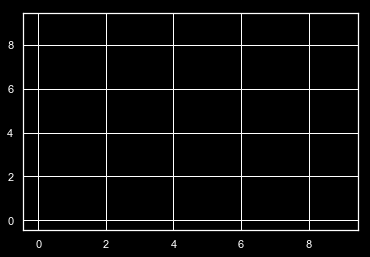

In [34]:
from matplotlib import pyplot as plt
from celluloid import Camera

fig = plt.figure()
camera = Camera(fig)
for i in range(10):
    plt.plot([i] * 10)
    camera.snap()
animation = camera.animate();
animation.save('celluloid_minimal.gif', writer = 'imagemagick');

In [32]:
from IPython.display import IFrame
IFrame('celluloid_minimal.gif', width=800, height=350)

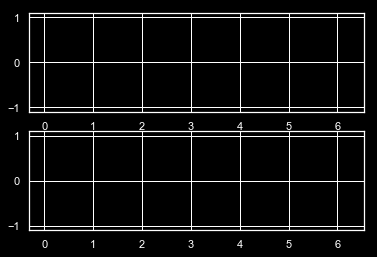

In [35]:
import numpy as np
from matplotlib import pyplot as plt
from celluloid import Camera

fig, axes = plt.subplots(2)
camera = Camera(fig)
t = np.linspace(0, 2 * np.pi, 128, endpoint=False)
for i in t:
    axes[0].plot(t, np.sin(t + i), color='blue')
    axes[1].plot(t, np.sin(t - i), color='blue')
    camera.snap()
    
animation = camera.animate()  
animation.save('celluloid_subplots.gif', writer = 'imagemagick');

In [36]:
from IPython.display import IFrame
IFrame('celluloid_subplots.gif', width=800, height=350)

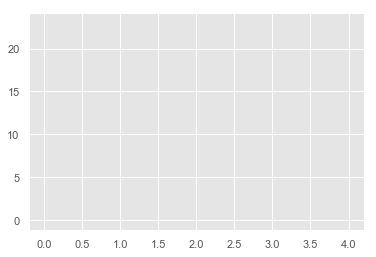

In [37]:
import matplotlib
from matplotlib import pyplot as plt
from celluloid import Camera
plt.style.use('ggplot')

fig = plt.figure()
camera = Camera(fig)
for i in range(20):
    t = plt.plot(range(i, i + 5))
    plt.legend(t, [f'line {i}'])
    camera.snap()
animation = camera.animate()
animation.save('celluloid_legends.gif', writer = 'imagemagick');

In [38]:
from IPython.display import IFrame
IFrame('celluloid_legends.gif', width=800, height=350)

# Bokeh

The basic steps to creating plots with the bokeh.plotting
interface are:
 1. Prepare some data:
Python lists, NumPy arrays, Pandas DataFrames and other sequences of values
 2. Create a new plot
 3. Add renderers for your data, with visual customizations
 4. Specify where to generate the output
 5. Show or save the results

In [1]:
from bokeh.plotting import figure
from bokeh.io import output_file, show

x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5] # step-1

p = figure(title="simple line example", 
           x_axis_label='x',
           y_axis_label='y') # step-2

p.line(x, y, legend="Temp.", line_width=2) # step-3

output_file("lines.html") # step-4

show(p) # step-5

In [2]:
import numpy as np
import pandas as pd
df = pd.DataFrame(np.array([[33.9,4,65, 'US'],
    [32.4,4,66, 'Asia'],
    [21.4,4,109, 'Europe']]),
    columns=['mpg','cyl', 'hp', 'origin'],
    index=['Toyota', 'Fiat', 'Volvo'])

from bokeh.models import ColumnDataSource

# manual convert
cds_df = ColumnDataSource(df)

In [4]:
# step-2 plotting
from bokeh.plotting import figure
p1 = figure(plot_width=300, tools='pan,box_zoom')
p2 = figure(plot_width=300, plot_height=300,
            x_range=(0, 8), y_range=(0, 8))
p3 = figure()

### Renderers and visual customisations

**Glyphs**

```python
# scatter
p1.circle(np.array([1,2,3]), np.array([3,2,1]),
 fill_color='white')
p2.square(np.array([1.5,3.5,5.5]), [1,4,3],
 color='blue', size=1)
# line
p1.line([1,2,3,4], [3,4,5,6], line_width=2)
p2.multi_line(pd.DataFrame([[1,2,3],[5,6,7]]),
 pd.DataFrame([[3,4,5],[3,2,1]]),
 color="blue")
```

**Customised Glyphs**

```python
# Selection and Non-Selection Glyphs
p = figure(tools='box_select')
p.circle('mpg', 'cyl', source=cds_df,
 selection_color='red',
 nonselection_alpha=0.1)

# Hover Glyphs
from bokeh.models import HoverTool
hover = HoverTool(tooltips=None, mode='vline')
p3.add_tools(hover) 

# Colormapping
from bokeh.models import CategoricalColorMapper
color_mapper = CategoricalColorMapper(
    factors=['US', 'Asia', 'Europe'],
    palette=['blue', 'red', 'green'])
p3.circle('mpg', 'cyl', source=cds_df,
          color=dict(field='origin', transform=color_mapper),
          legend='Origin')
```

**Legend**

```python
# Inside Plot Area
p.legend.location = 'bottom_left'
# Outside Plot Area
from bokeh.models import Legend
r1 = p2.asterisk(np.array([1,2,3]), np.array([3,2,1]))
r2 = p2.line([1,2,3,4], [3,4,5,6])
legend = Legend(items=[("One" ,[p1, r1]),("Two",[r2])],
                location=(0, -30))
p.add_layout(legend, 'right')
# Orientation
p.legend.orientation = "horizontal"
p.legend.orientation = "vertical"
# background
p.legend.border_line_color = "navy"
p.legend.background_fill_color = "white"
```

**Row and column**

```python
# Rows
from bokeh.layouts import row
layout = row(p1,p2,p3)
# Columns
from bokeh.layouts import columns
layout = column(p1,p2,p3)
#Nesting Rows & Columns
layout = row(column(p1,p2), p3)
```

**Grid Layout**

```python
from bokeh.layouts import gridplot
row1 = [p1,p2]
row2 = [p3]
layout = gridplot([[p1,p2],[p3]])
```

**Tabbed Layout**

```python
from bokeh.models.widgets import Panel, Tabs
tab1 = Panel(child=p1, title="tab1")
tab2 = Panel(child=p2, title="tab2")
layout = Tabs(tabs=[tab1, tab2])
```

**Linked Plot**

```python
# Linked Axes
p2.x_range = p1.x_range
p2.y_range = p1.y_range
# Linked Brushing
p4 = figure(plot_width = 100,
            tools='box_select,lasso_select')
p4.circle('mpg', 'cyl', source=cds_df)
p5 = figure(plot_width = 200,
            tools='box_select,lasso_select')
p5.circle('mpg', 'hp', source=cds_df)
layout = row(p4,p5)
```

**Output and Export**

```python
# Notebook
from bokeh.io import output_notebook, show
output_notebook()
# HTML - Standalone
from bokeh.embed import file_html
from bokeh.resources import CDN
html = file_html(p, CDN, "my_plot")
from bokeh.io import output_file, show
output_file('my_bar_chart.html', mode='cdn')
# Components
from bokeh.embed import components
script, div = components(p)

# PNG and SVG
from bokeh.io import export_png
export_png(p, filename="plot.png")

from bokeh.io import export_svgs
p.output_backend = "svg"
export_svgs(p, filename="plot.svg")

show(p1)
save(p1)
```

# Plotly

In [8]:
import plotly
#plotly.offline.plot()

In [9]:
import plotly.graph_objs as go

In [10]:
trace1 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[0, 2, 3, 5],
    fill='tozeroy',
    mode='none'
)
trace2 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[3, 5, 1, 7],
    fill='tonexty',
    mode='none'
)

data = [trace1, trace2]

plotly.offline.plot(data)

'temp-plot.html'

In [11]:
import numpy as np

N = 100
random_x = np.linspace(0, 1, N)
random_y0 = np.random.randn(N) + 5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N) - 5

trace0 = go.Scatter(
    x = random_x,
    y = random_y0,
    mode = 'markers',
    name = 'markers'
)
trace1 = go.Scatter(
    x = random_x,
    y = random_y1,
    mode = 'lines+markers',
    name = 'lines+markers'
)
trace2 = go.Scatter(
    x = random_x,
    y = random_y2,
    mode = 'lines',
    name = 'lines'
)
data = [trace0, trace1, trace2]
plotly.offline.plot(data, filename='scatter-mode')

/Users/Ocean/.virtualenvs/general/lib/python3.7/site-packages/plotly/offline/offline.py:524: UserWarning:

Your filename `scatter-mode` didn't end with .html. Adding .html to the end of your file.



'scatter-mode.html'

In [14]:
N = 500

trace0 = go.Scatter(
    x = np.random.randn(N),
    y = np.random.randn(N) + 2,
    name = 'Above',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = np.random.randn(500),
        colorscale = 'Viridis',
        showscale = True,
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)
trace1 = go.Scatter(
    x = np.random.randn(N),
    y = np.random.randn(N) - 2,
    name = 'Below',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
    )
)
data = [trace0, trace1]

layout = dict(title = 'Styled Scatter',
                 yaxis = dict(zeroline = False),
                 xaxis = dict(zeroline = False)
             )
fig = dict(data=data, layout=layout)
plotly.offline.plot(fig, filename='styled-scatter.html')

'styled-scatter.html'

In [17]:
z_data = np.ndarray((400, 10))

In [19]:
data = [
    go.Surface(
        z=z_data
    )
]
layout = go.Layout(
    title='Surface',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
#import plotly.plotly as py
#py.iplot(fig, filename='surface.html')
plotly.offline.plot(fig, filename='surface.html')

'surface.html'

# Seaborn

**Basic**

```python
import matplotlib.pyplot as plt
import seaborn as sns
tips = sns.load_dataset("tips")
sns.set_style("whitegrid")
g = sns.lmplot(x="tip", y="total_bill", data=tips,
 aspect=2)
g = (g.set_axis_labels("Tip","Total bill(USD)").
set(xlim=(0,10),ylim=(0,100)))
plt.title("title")
plt.show(g)
```

**Figure Aesthetics**

```python
f, ax = plt.subplots(figsize=(5,6)) 

sns.set() # (Re)set the seaborn default
sns.set_style("whitegrid") # Set the matplotlib parameters
sns.set_style("ticks", {"xtick.major.size":8, "ytick.major.size":8})
sns.axes_style("whitegrid") # Return a dict of params or use with with to temporarily set the style

sns.set_context("talk") #Set context to "talk"
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2.5})

sns.set_palette("husl",3) #Define the color palette
sns.color_palette("husl") # Use with with to temporarily set palette
flatui = ["#9b59b6","#3498db","#95a5a6","#e74c3c","#34495e","#2ecc71"]
sns.set_palette(flatui) #Set your own color palette
```

**Axis Grid**

```python
g = sns.FacetGrid(titanic, 
                      col="survived", 
                      row="sex")
g = g.map(plt.hist,"age")
sns.factorplot(x="pclass", 
                   y="survived", 
                   hue="sex",
               data=titanic)
sns.lmplot(x="sepal_width", 
               y="sepal_length", 
               hue="species",
           data=iris)
h = sns.PairGrid(iris) 
h = h.map(plt.scatter) 
sns.pairplot(iris) 
i = sns.JointGrid(x="x", 
                  y="y", 
                  data=data)
i = i.plot(sns.regplot,
           sns.distplot)
sns.jointplot("sepal_length", 
              "sepal_width",
              data=iris,
              kind='kde')
```

**Categorical**

```python
# Scatterplot
sns.stripplot(x="species",  y="petal_length",  data=iris)
sns.swarmplot(x="species",  y="petal_length",  data=iris)
# Bar Chart
sns.barplot(x="sex",  y="survived",  hue="class",  data=titanic)
# Count Plot
sns.countplot(x="deck",  data=titanic,
              palette="Greens_d")
# Point Plot
sns.pointplot(x="class",  y="survived",  hue="sex",  data=titanic,
              palette={"male":"g",
                       "female":"m"},
              markers=["^","o"],
              linestyles=["-","--"])
# Boxplot
sns.boxplot(x="alive",  y="age",
            hue="adult_male",
            data=titanic)
sns.boxplot(data=iris,orient="h") 
# Violinplot
sns.violinplot(x="age",  y="sex",
               hue="survived",
               data=titanic)
```

**Regression**

```python
sns.regplot(x="sepal_width",
            y="sepal_length", 
            data=iris,
            ax=ax)
```

**Distribution**

```python
plot = sns.distplot(data.y, kde=False, color="b")
# Heat
sns.heatmap(uniform_data,vmin=0,vmax=1)
```

**Axisgrid Object**

```python
g.despine(left=True) 
g.set_ylabels("Survived") 
g.set_xticklabels(rotation=45) 
g.set_axis_labels("Survived", 
                  "Sex")
h.set(xlim=(0,5), 
      ylim=(0,5), x-and y-axis
      xticks=[0,2.5,5],
      yticks=[0,2.5,5])
```

**PLot**

```python
plt.title("A Title")
plt.ylabel("Survived") 
plt.xlabel("Sex") 
plt.ylim(0,100)
plt.xlim(0,10) 
plt.setp(ax,yticks=[0,5]) 
plt.tight_layout() 
```

**Show, save, clean**

```python
plt.show() 
plt.savefig("foo.png") 
plt.savefig("foo.png",
            transparent=True) 

plt.cla() 
plt.clf() 
plt.close() 
```
